# Segment each fibre for 2D slice with trained UnetID
- Author: Rui Guo (KU Leuven), rui.guo1@kuleuven.be
- Date: Jan 2023

## Import packages

In [1]:
import os
import numpy as np
import fibresegt as fs
import matplotlib.pyplot as plt

## Path for output and pretained model

In [2]:
# The path for the output results
output_dir = './output/demo/'
# The path for the trained net model 
trainedNet_dir = './output/demo/checkpoint/'

## Load the images

In [3]:
dataset_folder = './data/demo/2DData/'
# dataset_name = 'slice_00002.tif'
dataset_name = 'slice_00018.tif'

In [4]:
dataset_file = fs.join(dataset_folder + dataset_name)
origData = np.array([fs.imread(dataset_file)])

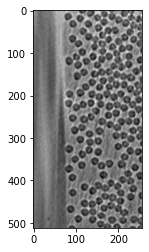

In [5]:
plt.figure()
plt.imshow(origData[0,0:512,0:256], cmap='gray')
plt.show()

## Automatically segment fibre

- **1. checkpoint_id**  
This is used to which trained model will be used. The default is the last one. You can also specify the specific number
- **2. crop_input_shape**   
You can simple choose this according to your training image size
- **3. save_orig_results**  
If you set this variable as True, then the results before prost processing are saved.  
In order to save the space, you can set it as False. Then only the results after post processing will be saved.  
- **4. hardware_acltr**  
You can also use CPU to segment your data. Default is GPU will be used.
- **5. postproc_param**  
If you don't want to use post processing, you can set it as None.  
This post processing is used to remove the noise by using opening operation. 
The most things you should be careful is the 'kernel', which is morphological structuring element.  For post process, it is important to choose an appropriate parameter for kernel size.  
The default is "kernel": {"kernel_shape":"disk", "kernel_radius":4}, you can set the kernel radius as 1, 2, 3, 4, 5 according your requirements.  
Of course, you can also choose the ellipse kernel shape, now you should input the kernel size instand of kernel radius, such as: {"kernel_shape":"ellipse", "kernel_size":4}. The size you can choose any value as your requirements.

In [6]:
dataset            = origData[0]
net_var            = 'UnetID'
output_dir         = output_dir
trainedNet_dir     = trainedNet_dir
dataset_name       = dataset_name # Default is segm_results_2D
checkpoint_id      = 'last_id' # or checkpoint_id=200
crop_input_shape   = (64,64,1)
save_orig_results  = False 
hardware_acltr     = 'CPU' # Default is 'GPU'
postproc_param     =  {"method": "open", "kernel": {"kernel_shape":"disk", "kernel_radius":4}, 
                       "iteration": 1, "save_postproc_results":True} # Remove small artifacts or set it as None if don't want to do any prost processing

In [7]:
segm_img = fs.apis.segm_2d_data(dataset=dataset, 
                                net_var=net_var, 
                                output_dir=output_dir,
                                trainedNet_dir=trainedNet_dir,
                                dataset_name=dataset_name,
                                checkpoint_id=checkpoint_id, 
                                crop_input_shape=crop_input_shape,
                                save_orig_results=save_orig_results,
                                hardware_acltr=hardware_acltr,
                                **postproc_param)

You have to use CPU to calculate


C:\Users\u0145984\anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Segmentation is finished, 
The time needed is:  46.53899955749512
Now we are saving the results ...
All finished!
